In [48]:
# 逻辑回归预测考试通过

In [49]:
import pandas as pd
import numpy as np

data = pd.read_csv('chip_test.csv')
data.head()

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,0.183760,0.93348,0


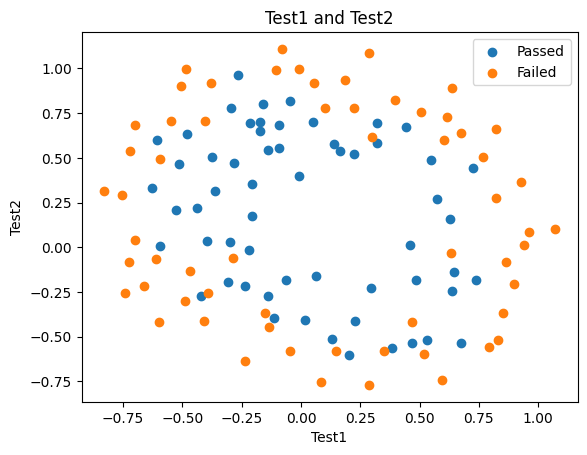

In [50]:
from matplotlib import pyplot as plt
fig1 = plt.figure()
y = data.loc[:, 'pass']
mask = y == 1
x1 = data.loc[:, 'test1']
x2 = data.loc[:, 'test2']
passed = plt.scatter(x1[mask], x2[mask])
failed = plt.scatter(x1[~mask], x2[~mask], )
plt.title('Test1 and Test2') 
plt.xlabel('Test1')
plt.ylabel('Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

In [51]:
x = data.drop(['pass'], axis='columns').values.reshape(-1, 2)
x1_square = x1 ** 2
x2_square = x2 ** 2
x1_x2 = x1 * x2
x_new = {'x1': x1, 'x2': x2, 'x1_square': x1_square, 'x2_square': x2_square, 'x1_x2': x1_x2}
x_new = pd.DataFrame(x_new)
x_new.head()

,x1,x2,x1_square,x2_square,x1_x2
0,0.051267,0.69956,0.002628,0.489384,0.035864
1,-0.092742,0.68494,0.008601,0.469143,-0.063523
2,-0.213710,0.69225,0.045672,0.479210,-0.147941
3,-0.375000,0.50219,0.140625,0.252195,-0.188321
4,0.183760,0.93348,0.033768,0.871385,0.171536


In [52]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_new, y)

LogisticRegression()

In [53]:
from sklearn.metrics import accuracy_score
y_predict = LR.predict(x_new)
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.8135593220338984


In [54]:
def solve(x):
    a = theta4
    b = theta5 * x + theta2
    c = theta0 + theta1 * x + theta3 * x ** 2
    boundary1 = (-b + np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)
    boundary2 = (-b - np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)
    return boundary1, boundary2

In [55]:
# x1_sorted = x1.sort_values()
theta0 = LR.intercept_[0]
theta1, theta2, theta3, theta4, theta5 = LR.coef_[0]
x2_new_boundary1 = []
x2_new_boundary2 = []
# better show the boundary
x1_range = [-0.9 + x / 10000 for x in range(19000)]
for x in x1_range:
    boundary1, boundary2 = solve(x)
    x2_new_boundary1.append(boundary1)
    x2_new_boundary2.append(boundary2)

C:\Users\yoga\AppData\Local\Temp\ipykernel_9468\3183929179.py:5: RuntimeWarning: invalid value encountered in sqrt
  boundary1 = (-b + np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)
C:\Users\yoga\AppData\Local\Temp\ipykernel_9468\3183929179.py:6: RuntimeWarning: invalid value encountered in sqrt
  boundary2 = (-b - np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)


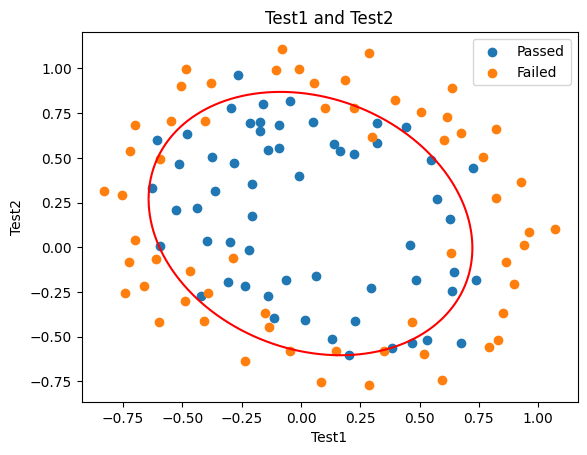

In [56]:
fig2 = plt.figure()
passed = plt.scatter(x1[mask], x2[mask])
failed = plt.scatter(x1[~mask], x2[~mask], )
plt.plot(x1_range, x2_new_boundary1, color='red')
plt.plot(x1_range, x2_new_boundary2, color='red')
plt.title('Test1 and Test2') 
plt.xlabel('Test1')
plt.ylabel('Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()